🚀 Simple Data Quality Assessment
🔍 SIMPLE DATA QUALITY CHECK
✅ Data loaded from spotify_scaled_hybrid_tiny.json

📊 Dataset Type: Spotify Playlist Data
📋 Total playlists: 299
📈 Generation date: 2025-08-15T15:47:34.835747
📈 Scale: tiny

🔍 QUALITY ASSESSMENT
------------------------------
❓ Missing values: 257 total
   Top missing fields:
   • description: 257 (86.0%)
🔄 Duplicate playlists (by ID): 0 (0.0%)

🏷️ Data types:
   • int64: 8 columns
   • object: 4 columns
   • float64: 1 columns

📊 Numeric columns analysis:
   • pid: [765.00, 990562.00], μ=498644.74
   • modified_at: [1310601600.00, 1509408000.00], μ=1473275462.21
   • num_tracks: [10.00, 100.00], μ=44.17
   • num_albums: [2.00, 96.00], μ=33.68
   • num_followers: [1.00, 71643.00], μ=1595.51
   • num_edits: [2.00, 62.00], μ=11.87
   • duration_ms: [1229033.00, 94953960.00], μ=10623346.73
   • num_artists: [3.00, 88.00], μ=28.04
   • _sampling_score: [4.75, 15.00], μ=12.27

🎵 Spotify-specific analysis:
   • Avg tracks per playl

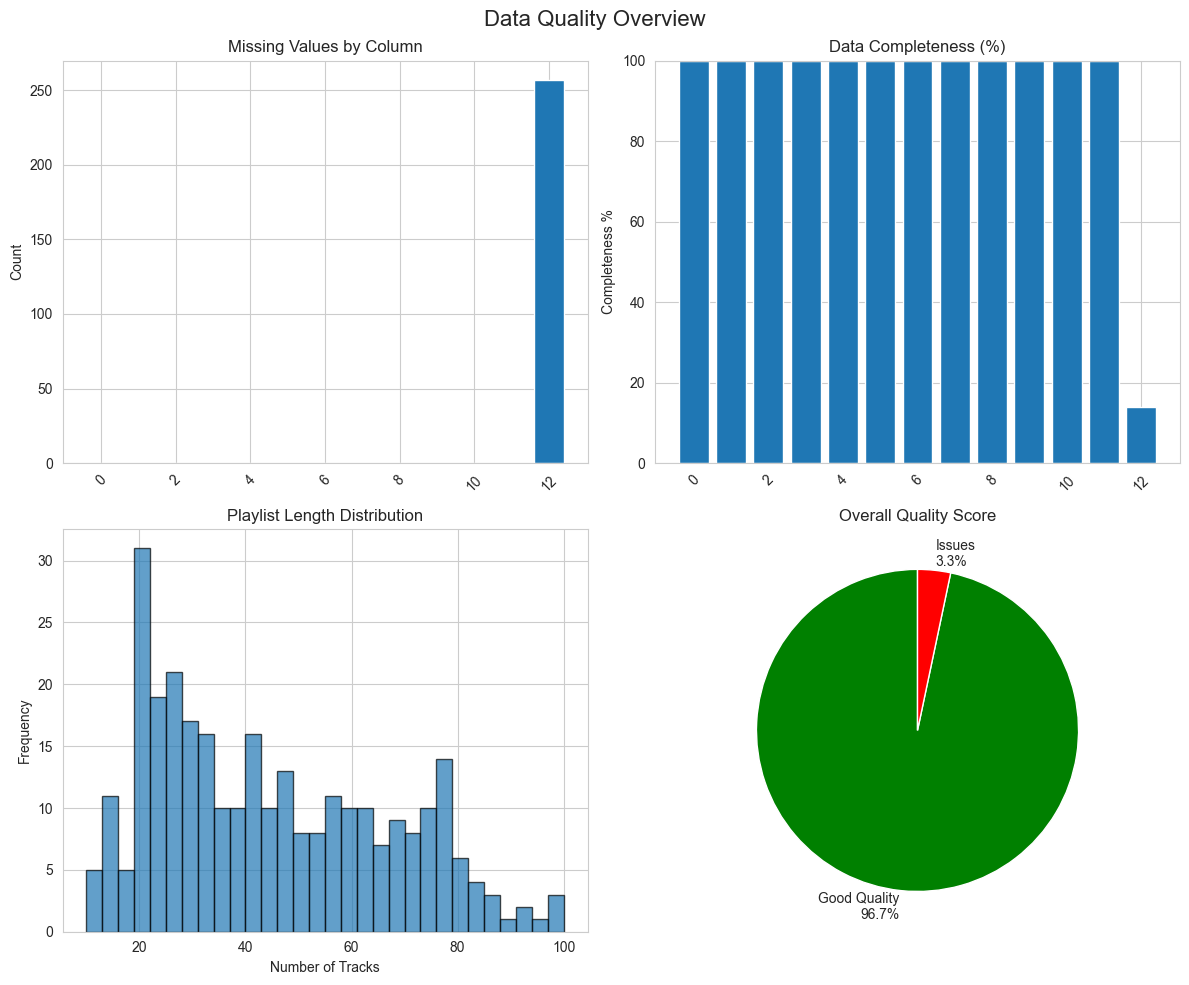


✅ QUALITY SUMMARY
📊 Overall Quality Score: 96.7%
📋 Total Records: 299
📊 Total Fields: 13
❓ Missing Data: 6.6%
🔄 Duplicate Rate: 0.0%
🎉 Excellent data quality!

📁 Report saved as 'simple_quality_report.png'

🔍 QUICK EXPLORATORY DATA ANALYSIS
📊 Dataset shape: (299, 13)
💾 Memory usage: 0.20 MB

📋 Column Information:
    1. name                 | object     | 288 unique
    2. collaborative        | object     | 2 unique
    3. pid                  | int64      | 299 unique
    4. modified_at          | int64      | 244 unique
    5. num_tracks           | int64      | 82 unique
    6. num_albums           | int64      | 73 unique
    7. num_followers        | int64      | 196 unique
    8. tracks               | object     | Contains 13,206 total tracks
    9. num_edits            | int64      | 47 unique
   10. duration_ms          | int64      | 299 unique
   11. num_artists          | int64      | 63 unique
   12. _sampling_score      | float64    | 150 unique
   13. description      

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path

def simple_quality_check(data_path):
    """
    Simple data quality check using only core libraries
    """
    print("🔍 SIMPLE DATA QUALITY CHECK")
    print("="*50)

    # Load data
    data_path = Path(data_path)

    try:
        if data_path.suffix.lower() == '.json':
            with open(data_path, 'r') as f:
                data = json.load(f)
        elif data_path.suffix.lower() == '.csv':
            data = pd.read_csv(data_path)
        else:
            print(f"❌ Unsupported file type: {data_path.suffix}")
            return
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return

    print(f"✅ Data loaded from {data_path.name}")

    # Handle JSON data (like your Spotify dataset)
    if isinstance(data, dict) and 'playlists' in data:
        print(f"\n📊 Dataset Type: Spotify Playlist Data")
        playlists = data['playlists']
        print(f"📋 Total playlists: {len(playlists):,}")

        # Convert to DataFrame for analysis
        df = pd.DataFrame(playlists)

        # Basic info
        if 'info' in data:
            print(f"📈 Generation date: {data['info'].get('generated_on', 'Unknown')}")
            print(f"📈 Scale: {data['info'].get('scale', 'Unknown')}")

    elif isinstance(data, pd.DataFrame):
        df = data
        print(f"\n📊 Dataset Type: CSV/DataFrame")
        print(f"📋 Shape: {df.shape}")

    else:
        print("❌ Unsupported data format")
        return

    # QUALITY CHECKS
    print(f"\n🔍 QUALITY ASSESSMENT")
    print("-" * 30)

    # 1. Missing values
    missing = df.isnull().sum()
    total_missing = missing.sum()
    print(f"❓ Missing values: {total_missing:,} total")

    if total_missing > 0:
        print("   Top missing fields:")
        top_missing = missing[missing > 0].sort_values(ascending=False).head(5)
        for field, count in top_missing.items():
            pct = (count / len(df)) * 100
            print(f"   • {field}: {count:,} ({pct:.1f}%)")

    # 2. Duplicates (handle list columns safely)
    try:
        # For Spotify data, check duplicates by playlist ID if available
        if 'pid' in df.columns:
            duplicates = df.duplicated(subset=['pid']).sum()
            print(f"🔄 Duplicate playlists (by ID): {duplicates:,} ({(duplicates/len(df)*100):.1f}%)")
        else:
            # Check duplicates only on non-list columns
            non_list_cols = []
            for col in df.columns:
                try:
                    # Test if column can be used for duplicate detection
                    df[col].iloc[0].__hash__()
                    non_list_cols.append(col)
                except (TypeError, AttributeError):
                    pass

            if non_list_cols:
                duplicates = df.duplicated(subset=non_list_cols).sum()
                print(f"🔄 Duplicate rows (non-list cols): {duplicates:,} ({(duplicates/len(df)*100):.1f}%)")
            else:
                duplicates = 0
                print(f"🔄 Duplicate check: Skipped (contains unhashable types)")
    except Exception as e:
        duplicates = 0
        print(f"🔄 Duplicate check: Skipped (error: {str(e)[:50]})")

    # 3. Data types
    print(f"\n🏷️ Data types:")
    for dtype, count in df.dtypes.value_counts().items():
        print(f"   • {dtype}: {count} columns")

    # 4. Numeric analysis
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📊 Numeric columns analysis:")
        for col in numeric_cols:
            print(f"   • {col}: [{df[col].min():.2f}, {df[col].max():.2f}], μ={df[col].mean():.2f}")

    # 5. Spotify-specific checks
    if 'tracks' in df.columns:
        print(f"\n🎵 Spotify-specific analysis:")
        track_counts = df['tracks'].apply(lambda x: len(x) if isinstance(x, list) else 0)
        print(f"   • Avg tracks per playlist: {track_counts.mean():.1f}")
        print(f"   • Empty playlists: {(track_counts == 0).sum():,}")
        print(f"   • Largest playlist: {track_counts.max()} tracks")

    if 'user_id' in df.columns:
        print(f"   • Unique users: {df['user_id'].nunique():,}")
        user_counts = df['user_id'].value_counts()
        print(f"   • Avg playlists per user: {user_counts.mean():.1f}")

    # SIMPLE VISUALIZATIONS
    print(f"\n📈 Creating basic visualizations...")

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Data Quality Overview', fontsize=16)

    # 1. Missing values
    axes[0,0].bar(range(len(missing)), missing.values)
    axes[0,0].set_title('Missing Values by Column')
    axes[0,0].set_ylabel('Count')
    axes[0,0].tick_params(axis='x', rotation=45)

    # 2. Data completeness
    completeness = (1 - missing / len(df)) * 100
    axes[0,1].bar(range(len(completeness)), completeness.values)
    axes[0,1].set_title('Data Completeness (%)')
    axes[0,1].set_ylabel('Completeness %')
    axes[0,1].set_ylim(0, 100)
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Playlist lengths (if applicable)
    if 'tracks' in df.columns:
        track_counts = df['tracks'].apply(lambda x: len(x) if isinstance(x, list) else 0)
        axes[1,0].hist(track_counts, bins=30, alpha=0.7, edgecolor='black')
        axes[1,0].set_title('Playlist Length Distribution')
        axes[1,0].set_xlabel('Number of Tracks')
        axes[1,0].set_ylabel('Frequency')
    else:
        axes[1,0].text(0.5, 0.5, 'No track data\navailable', ha='center', va='center')
        axes[1,0].set_title('Playlist Analysis')

    # 4. Quality score (handle missing duplicates value)
    missing_score = (1 - total_missing / (len(df) * len(df.columns))) * 100
    try:
        duplicate_score = (1 - duplicates / len(df)) * 100
    except:
        duplicate_score = 100  # Assume no duplicates if we couldn't check
    overall_score = (missing_score + duplicate_score) / 2

    scores = [overall_score, 100 - overall_score]
    labels = [f'Good Quality\n{overall_score:.1f}%', f'Issues\n{100-overall_score:.1f}%']
    colors = ['green', 'red']
    axes[1,1].pie(scores, labels=labels, colors=colors, startangle=90)
    axes[1,1].set_title('Overall Quality Score')

    plt.tight_layout()
    plt.savefig('simple_quality_report.png', dpi=300, bbox_inches='tight')
    plt.show()

    # SUMMARY
    print(f"\n✅ QUALITY SUMMARY")
    print("=" * 30)
    print(f"📊 Overall Quality Score: {overall_score:.1f}%")
    print(f"📋 Total Records: {len(df):,}")
    print(f"📊 Total Fields: {len(df.columns)}")
    print(f"❓ Missing Data: {(total_missing/(len(df)*len(df.columns))*100):.1f}%")
    try:
        print(f"🔄 Duplicate Rate: {(duplicates/len(df)*100):.1f}%")
    except:
        print(f"🔄 Duplicate Rate: Could not determine")

    if overall_score >= 90:
        print("🎉 Excellent data quality!")
    elif overall_score >= 80:
        print("✅ Good data quality")
    elif overall_score >= 70:
        print("⚠️ Acceptable quality, minor issues")
    else:
        print("❌ Quality issues need attention")

    print(f"\n📁 Report saved as 'simple_quality_report.png'")

    return df

# Quick EDA function
def quick_eda(df):
    """
    Quick exploratory data analysis
    """
    print(f"\n🔍 QUICK EXPLORATORY DATA ANALYSIS")
    print("=" * 40)

    # Basic stats
    print(f"📊 Dataset shape: {df.shape}")
    print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Column info
    print(f"\n📋 Column Information:")
    for i, col in enumerate(df.columns):
        dtype = df[col].dtype
        try:
            # Try to get unique count, handle unhashable types
            unique_vals = df[col].nunique()
            print(f"   {i+1:2d}. {col:20s} | {str(dtype):10s} | {unique_vals:,} unique")
        except TypeError:
            # Handle list columns
            if col == 'tracks':
                # Special handling for tracks column
                total_tracks = sum(len(tracks) if isinstance(tracks, list) else 0 for tracks in df[col])
                print(f"   {i+1:2d}. {col:20s} | {str(dtype):10s} | Contains {total_tracks:,} total tracks")
            else:
                print(f"   {i+1:2d}. {col:20s} | {str(dtype):10s} | Contains lists/unhashable data")
        except Exception as e:
            print(f"   {i+1:2d}. {col:20s} | {str(dtype):10s} | Error analyzing: {str(e)[:30]}")

    # Numeric summary
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📈 Numeric Summary:")
        print(df[numeric_cols].describe().round(2))

    # String columns
    string_cols = df.select_dtypes(include=['object']).columns
    if len(string_cols) > 0:
        print(f"\n📝 Text/Object Columns:")
        for col in string_cols[:5]:  # Show first 5
            try:
                unique_count = df[col].nunique()
                sample_vals = df[col].dropna().unique()[:3]
                print(f"   • {col}: {unique_count:,} unique | Sample: {list(sample_vals)}")
            except TypeError:
                # Handle list columns
                if col == 'tracks':
                    sample_track_lists = df[col].dropna().iloc[:2].tolist()
                    list_lengths = [len(x) if isinstance(x, list) else 0 for x in sample_track_lists]
                    print(f"   • {col}: Contains track lists | Sample lengths: {list_lengths}")
                else:
                    print(f"   • {col}: Contains unhashable data (lists/objects)")
            except Exception as e:
                print(f"   • {col}: Error analyzing - {str(e)[:40]}")

# Usage examples:
if __name__ == "__main__":
    # Example usage
    print("🚀 Simple Data Quality Assessment")
    df = simple_quality_check('../data/processed/spotify_scaled_hybrid_tiny.json')
    quick_eda(df)